## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [8]:
import pandas as pd

# Load the CSV file into a DataFrame
flight_data = pd.read_excel('flight_price.xlsx')  # Replace 'flight_price_dataset.csv' with your actual file name and path


In [9]:
# Get the dimensions of the dataset
num_rows, num_columns = flight_data.shape

# Print the number of rows and columns
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 10683 rows and 11 columns.


## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

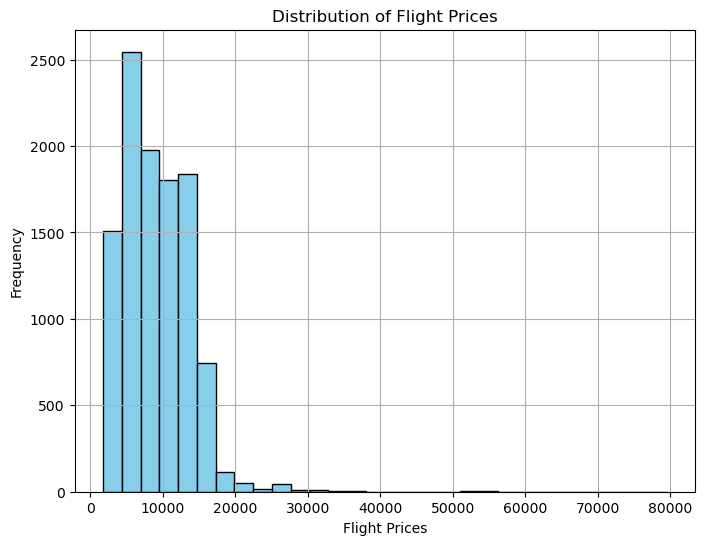

In [10]:
import matplotlib.pyplot as plt
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(flight_data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.grid(True)
plt.show()


## Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [11]:
# Find minimum and maximum prices
min_price = flight_data['Price'].min()
max_price = flight_data['Price'].max()

print(f"The range of prices in the dataset is from ${min_price:.2f} to ${max_price:.2f}")


The range of prices in the dataset is from $1759.00 to $79512.00


## Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

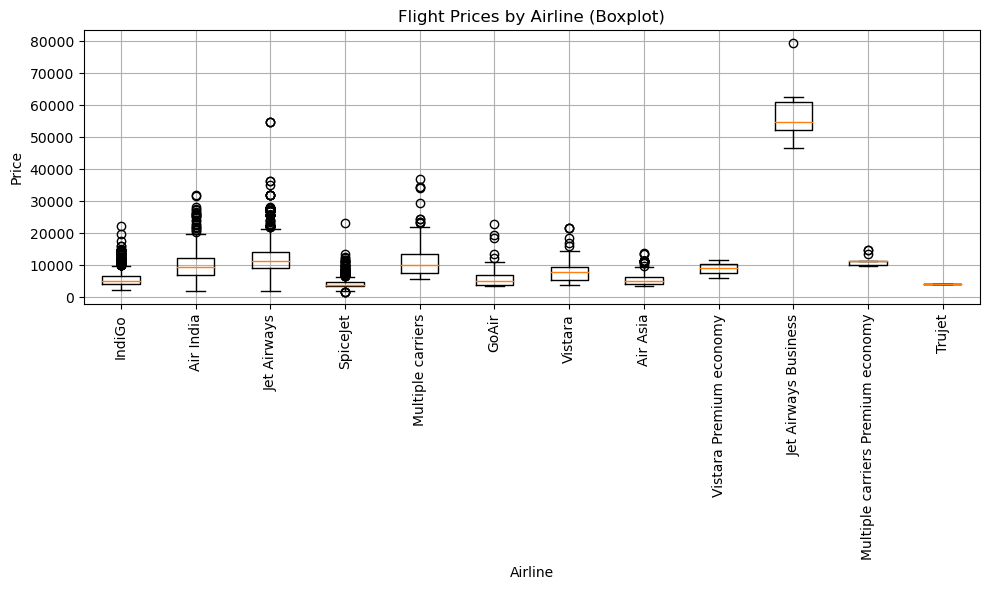

In [12]:
# Create a boxplot to compare prices by airline
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Flight Prices by Airline (Boxplot)')
plt.grid(True)

# Create the boxplot
plt.boxplot([flight_data[flight_data['Airline'] == airline]['Price'] for airline in flight_data['Airline'].unique()],
            labels=flight_data['Airline'].unique())

plt.tight_layout()
plt.show()


## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

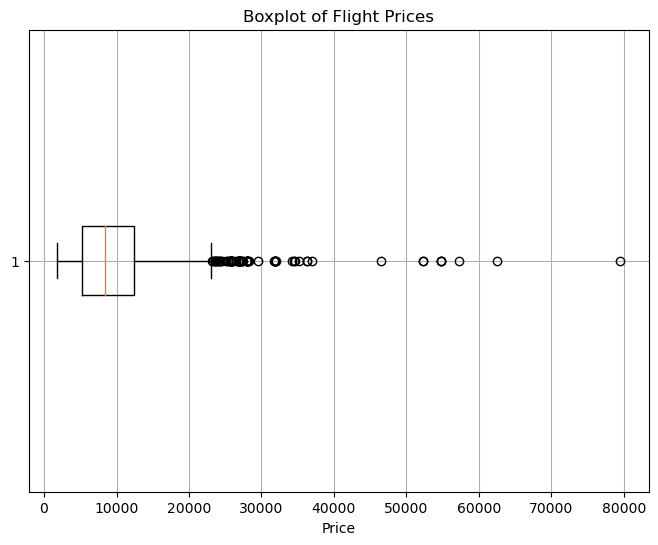

In [13]:
# Create a boxplot to visualize potential outliers in prices
plt.figure(figsize=(8, 6))
plt.boxplot(flight_data['Price'], vert=False)
plt.xlabel('Price')
plt.title('Boxplot of Flight Prices')
plt.grid(True)
plt.show()


Outliers can impact our analysis by skewing statistical measures like the mean and standard deviation, affecting the distributional assumptions of our data, and potentially influencing model performance if not handled appropriately. It's essential to investigate the nature of these outliers to determine whether they are errors, anomalies, or legitimate data points before deciding how to manage or handle them in our analysis. Potential actions could include removing them, transforming the data, or using robust statistical methods that are less sensitive to outliers.


## Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?


To identify the peak travel season from the Flight Price dataset, several features can be analyzed:

1. Date/Time Information: Analyzing the flight prices over different months or seasons can reveal patterns. We can group data by months or seasons and examine the average prices or price trends over time.

2. Booking Patterns: Look for trends in booking dates. High prices might coincide with specific booking periods, indicating peak travel times.

3. Holidays and Events: Check if there's a correlation between flight prices and holidays or major events in specific regions. Prices tend to increase during popular holidays or events.

4. Destination Specific Analysis: Different destinations might have different peak seasons due to climate, local events, or tourist attractions. Analyze flight prices concerning specific destinations.

In [15]:
# Assuming there's a 'Date' column containing date information, convert it to a datetime object
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'])

# Extract month and year information from the 'Date' column
flight_data['Month'] = flight_data['Date_of_Journey'].dt.month
flight_data['Year'] = flight_data['Date_of_Journey'].dt.year

# Calculate the average flight prices per month
avg_prices_by_month = flight_data.groupby(['Year', 'Month'])['Price'].mean().reset_index()

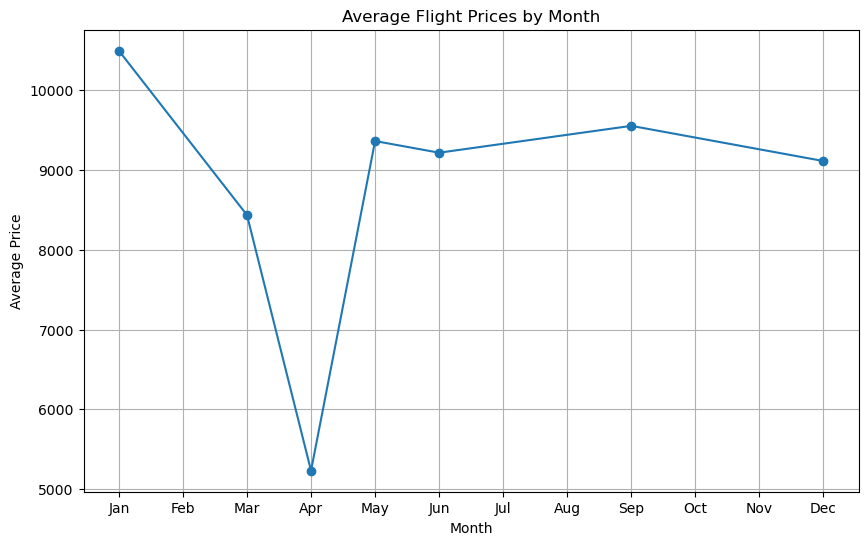

In [16]:
# Plotting average flight prices per month
plt.figure(figsize=(10, 6))
plt.plot(avg_prices_by_month['Month'], avg_prices_by_month['Price'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


 This script calculates the average flight prices for each month across different years and plots a line graph showing the average prices per month. The peaks in the graph may indicate the peak travel seasons when prices are generally higher.

I can present these findings visually through the graph, highlighting months with consistently high average prices to suggest potential peak travel seasons to my boss. Additionally, highlighting specific holidays or events coinciding with these periods can provide further context to support my analysis.

## Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

To identify trends in flight prices from the Flight Price dataset, various features can be analyzed:

1. Temporal Trends: Analyze flight prices over time using date/time information. Look for trends, seasonality, or any patterns in price fluctuations throughout the year.

2. Price by Airlines: Analyze how prices vary among different airlines. Identify if certain airlines consistently offer higher or lower prices.

3. Price by Route/Location: Investigate how prices differ based on departure/arrival locations or specific routes. Some routes may have more stable pricing while others fluctuate significantly.

4. Advance Booking Analysis: Check if there's a correlation between booking time and prices. Analyze whether booking far in advance or closer to the departure date affects prices.

Here's a Python-based approach to analyze these trends and visualize the findings:

Analysis Steps:
1.  Temporal Analysis:

- Group data by months or specific time periods.
- Calculate average prices or price trends over time.
2. Price by Airlines:

- Group data by airlines.
- Calculate average prices or price ranges for each airline.
3. Price by Route/Location:

- Group data by routes or specific departure/arrival locations.
- Analyze average prices or price fluctuations for each route/location.
4. Advance Booking Analysis:

- Calculate the difference in prices based on the number of days between booking and departure.
5. Visualization Techniques:
- Line Charts: Display temporal trends in flight prices over months or years.

- Bar Graphs: Compare average prices among different airlines, routes, or locations.

- Heatmaps/Geographical Maps: Show price variations on a geographical map or heatmap for different routes or locations.

- Scatter Plots: Display the relationship between booking lead time and prices.

- Boxplots: Illustrate the distribution of prices for different airlines, locations, or routes and identify outliers or variations.

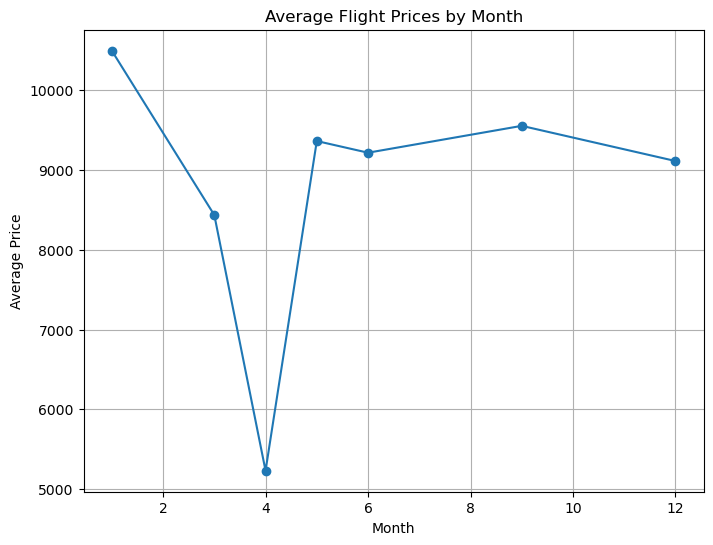

In [20]:
# 1. Temporal Analysis - Line chart
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'])  # Convert Date column to datetime
flight_data['Month'] = flight_data['Date_of_Journey'].dt.month  # Extract month
average_prices_by_month = flight_data.groupby('Month')['Price'].mean()

plt.figure(figsize=(8, 6))
plt.plot(average_prices_by_month.index, average_prices_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Month')
plt.grid(True)
plt.show()

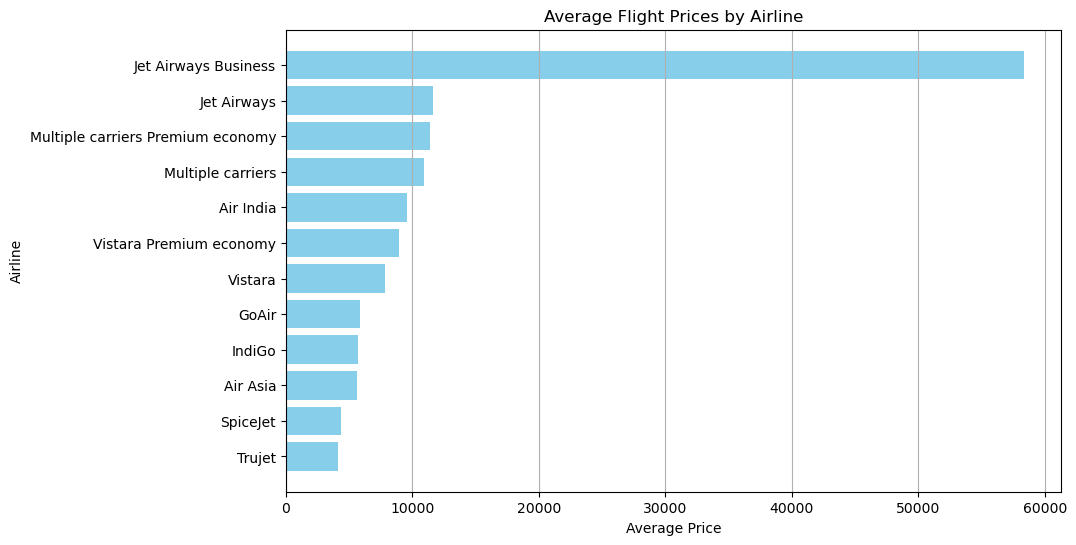

In [18]:
# 2. Price by Airlines - Bar graph
average_prices_by_airline = flight_data.groupby('Airline')['Price'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(average_prices_by_airline.index, average_prices_by_airline.values, color='skyblue')
plt.xlabel('Average Price')
plt.ylabel('Airline')
plt.title('Average Flight Prices by Airline')
plt.grid(axis='x')
plt.show()

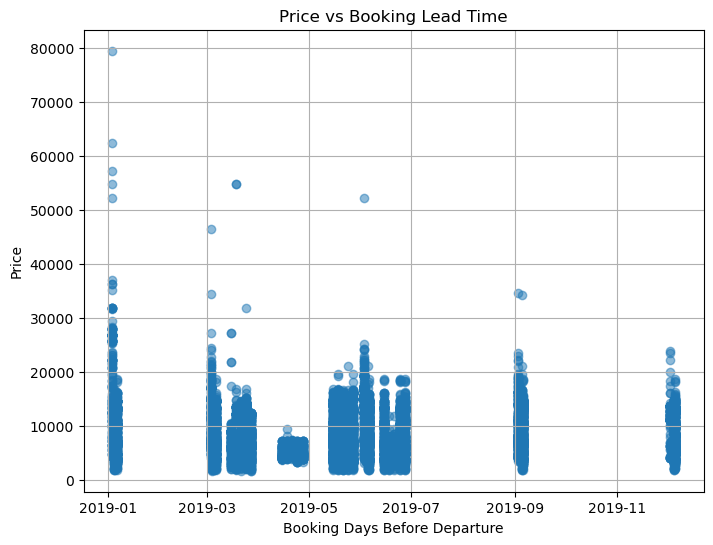

In [21]:
# 3. Advance Booking Analysis - Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(flight_data['Date_of_Journey'], flight_data['Price'], alpha=0.5)
plt.xlabel('Booking Days Before Departure')
plt.ylabel('Price')
plt.title('Price vs Booking Lead Time')
plt.grid(True)
plt.show()


## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

Identifying the factors that affect flight prices involves analyzing various features in the Flight Price dataset. Here are several features we could analyze to understand the determinants of flight prices:

### Time-related Features:

- Departure time: Analyze if flights during specific times of the day or week have different price ranges.
- Seasonality: Check for price fluctuations based on months or seasons.
### Route Information:

- Origin and destination: Analyze prices based on different routes.
- Distance between airports: Investigate if prices vary with the distance between airports.
### Airline Factors:

- Airline carrier: Examine how prices differ among different airlines.
- Class differences: Analyze prices across different flight classes (economy, business, first class).
### Booking and Travel Time:

- Advance booking: Check if booking earlier or closer to the travel date affects prices.
- Duration of the flight: Investigate if longer flights tend to have higher prices.
### Additional Factors:

- Flight stops/transfers: Determine if the number of stops affects prices.
- Special events/holidays: Analyze if prices increase during specific events or holidays.
### Approach to Present Findings:
#### Data Exploration and Visualization:

1. Use descriptive statistics and visualizations (boxplots, histograms, scatter plots) to explore relationships between factors and prices.

2. Calculate correlations between numerical features (e.g., distance, duration, advance booking time) and prices.

3. Perform regression analysis (linear regression, multiple regression) to identify significant factors affecting prices.

4. Utilize machine learning algorithms or statistical models to determine feature importance and their impact on flight prices.

5. Summarize key findings, highlighting the most influential factors affecting flight prices.
6. Provide actionable insights and recommendations based on the analysis.

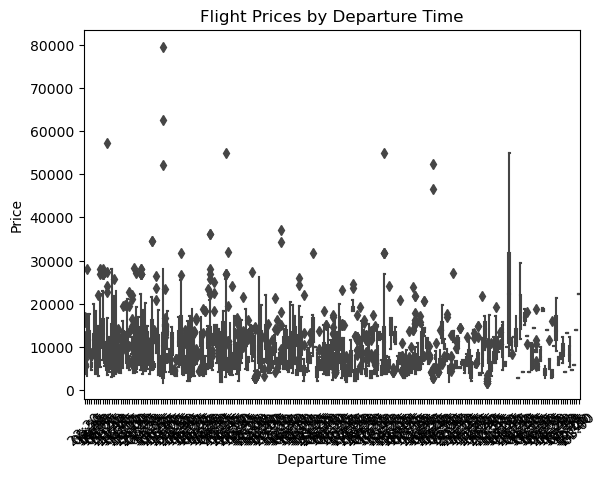

In [23]:
import seaborn as sns
# Feature analysis using visualizations

# Time-related features
sns.boxplot(x='Dep_Time', y='Price', data=flight_data)
plt.title('Flight Prices by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

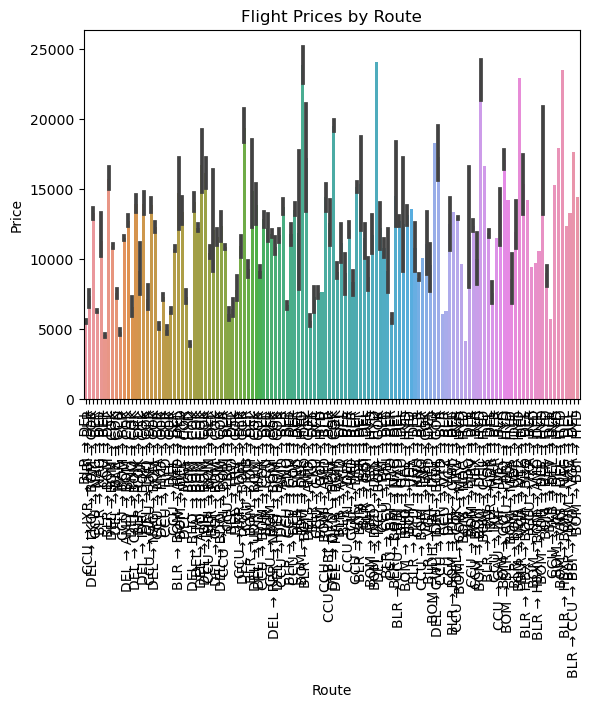

In [25]:
# Route information
sns.barplot(x='Route', y='Price', data=flight_data)
plt.title('Flight Prices by Route')
plt.xlabel('Route')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

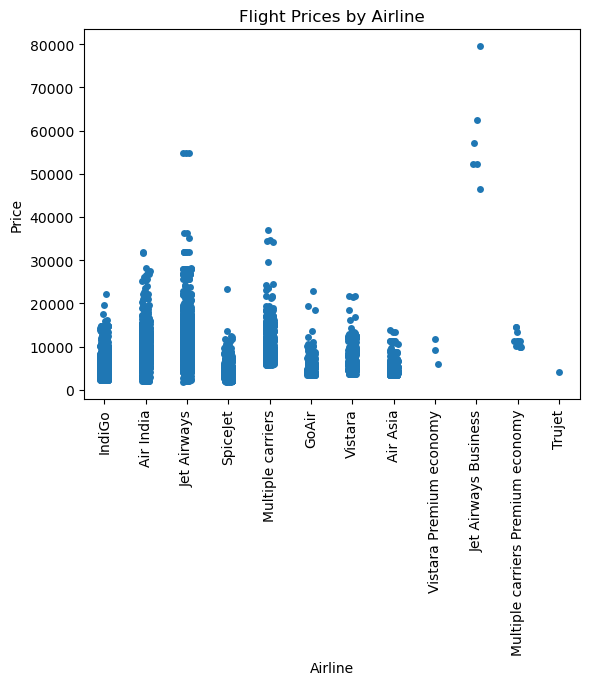

In [26]:

# Airline factors
sns.stripplot(x='Airline', y='Price', data=flight_data, jitter=True)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


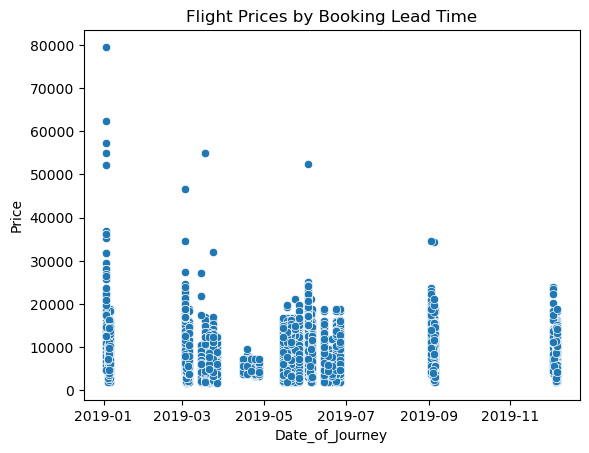

In [29]:

# Booking and travel time
sns.scatterplot(x='Date_of_Journey', y='Price', data=flight_data)
plt.title('Flight Prices by Booking Lead Time')
plt.xlabel('Date_of_Journey')
plt.ylabel('Price')
plt.show()

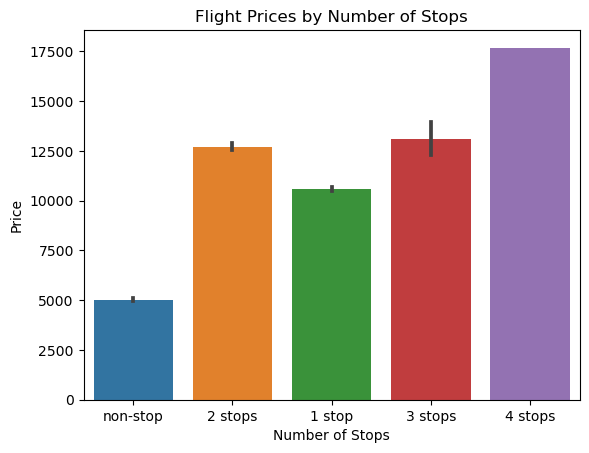

In [31]:

# Additional factors
sns.barplot(x='Total_Stops', y='Price', data=flight_data)
plt.title('Flight Prices by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()


# Google Playstore

## Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Get the dimensions of the dataset
num_rows, num_columns = df.shape

# Print the number of rows and columns
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 10841 rows and 13 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

<Figure size 1000x600 with 0 Axes>

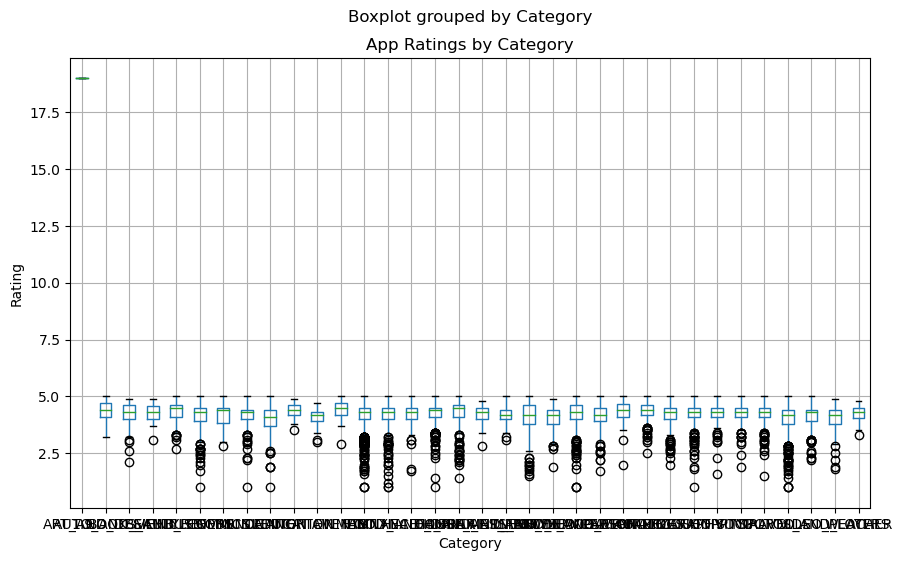

In [7]:
# Create a boxplot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
boxplot = df.boxplot(column='Rating', by='Category', figsize=(10, 6))

# Set plot title and labels
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')

# Show the plot
plt.show()


## Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [8]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64


#### Impact
- Specifically in the case of statistical analysis If there are missing values in the 'Rating' column (for instance), calculating the mean or median ratings for different categories might not accurately represent the true central tendency of the data. We may need to consider imputation techniques or handle missing values appropriately before analysis.

- And in case of visualization if Missing values in categorical columns, such as 'Category' or 'Type', might affect how these categories are represented in plots or charts, potentially skewing the visual interpretation of category distributions.

- Handling missing values depends on the specific dataset and analysis goals. Common strategies include dropping rows with missing values, imputing missing values with means or medians, or using more advanced techniques like predictive modeling to fill missing data.

## Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

Creating a scatter plot to visualize the relationship between the size of an app and its rating can help understand any potential correlation between these two variables in the Google Play Store dataset.

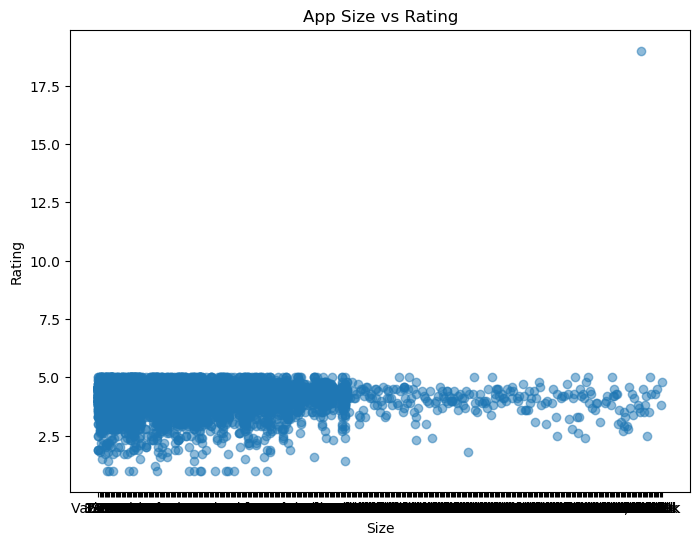

In [10]:
# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(df['Size'], df['Rating'], alpha=0.5)  # 'Size' on x-axis, 'Rating' on y-axis

# Set plot title and labels
plt.title('App Size vs Rating')
plt.xlabel('Size')
plt.ylabel('Rating')

# Show the plot
plt.show()

## Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [15]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)
average_prices = df.groupby('Type')['Price'].mean()

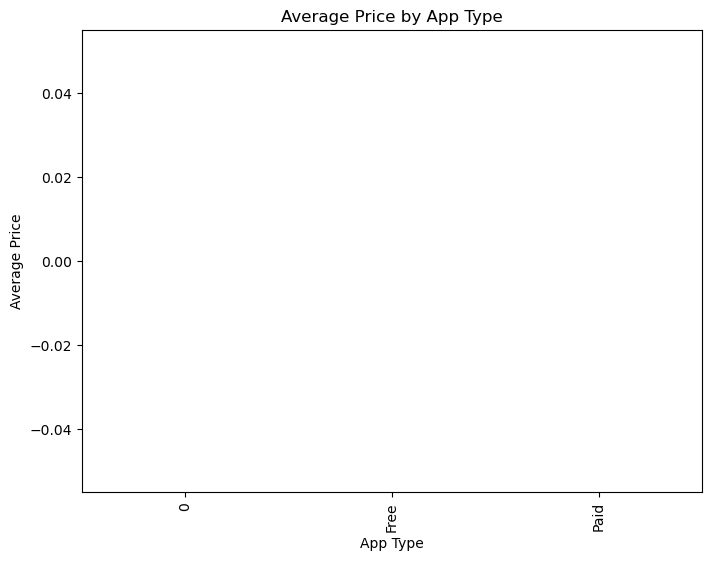

In [16]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set figure size
average_prices.plot(kind='bar', color='skyblue')  # Create the bar chart

# Set plot title and labels
plt.title('Average Price by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')

# Show the plot
plt.show()

## Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [19]:
# Clean 'Installs' column to extract numeric values and handle non-convertible entries
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')

# Function to convert 'Installs' column to numeric, handling non-convertible entries with NaN
def convert_to_numeric(value):
    try:
        return int(value)
    except ValueError:
        return pd.NA

# Apply the conversion function to the 'Installs' column
df['Installs'] = df['Installs'].apply(convert_to_numeric)

# Grouping by app names and summing up the installs for each app
app_installs = df.groupby('App')['Installs'].sum().sort_values(ascending=False)

# Selecting top 10 most installed apps
top_10_apps = app_installs.head(10)

# Displaying the top 10 most installed apps
print("Top 10 Most Installed Apps:")
print(top_10_apps)


Top 10 Most Installed Apps:
App
Subway Surfers                              6000000000
Google Photos                               4000000000
Instagram                                   4000000000
Hangouts                                    4000000000
Google News                                 4000000000
Google Drive                                4000000000
Candy Crush Saga                            3500000000
Messenger – Text and Video Chat for Free    3000000000
WhatsApp Messenger                          3000000000
Gmail                                       3000000000
Name: Installs, dtype: object


## Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

1. Data Loading and Exploration:
At 1st I need to Load the Google Play Store dataset into a DataFrame using Python's Pandas library and examine the structure and contents of the dataset. This step ensures understanding the available features for analysis.

In [20]:
import pandas as pd

# Load the Google Play Store dataset into a DataFrame
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows to understand the data structure
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  

2. Analysis of App Categories:
Identify the unique app categories available in the dataset and analyze their popularity based on various factors:

In [21]:
# a. Number of Apps per Category:
# Count the number of apps in each category to understand the distribution.

category_counts = df['Category'].value_counts()
print(category_counts)


FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64


In [24]:
# b. Average Installs per Category:
# Calculate the average number of installs for apps in each category to determine popular categories based on app installs.
# Clean 'Installs' column to extract numeric values and handle non-convertible entries
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')

# Function to convert 'Installs' column to numeric, handling non-convertible entries with NaN
def convert_to_numeric(value):
    try:
        return int(value)
    except ValueError:
        return pd.NA

# Apply the conversion function to the 'Installs' column
df['Installs'] = df['Installs'].apply(convert_to_numeric)

# Grouping by app names and summing up the installs for each app
app_installs = df.groupby('App')['Installs'].sum().sort_values(ascending=False)

print(app_installs)

App
Subway Surfers            6000000000
Google Photos             4000000000
Instagram                 4000000000
Hangouts                  4000000000
Google News               4000000000
                             ...    
AP Series Solution Pro             0
cronometra-br                      0
Sweden Newspapers                  0
CX Network                         0
Test Application DT 02             0
Name: Installs, Length: 9660, dtype: object


In [26]:
# c. Ratings Distribution by Category:
# Explore the distribution of app ratings across different categories to understand user satisfaction within each category.
# Calculate average ratings per category
avg_ratings_per_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(avg_ratings_per_category)


Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFESTYLE               4.094904
V

#### 3.  Visualization and Recommendations:
I Can Visualize the findings using plots such as bar charts, histograms, or boxplots to illustrate the popularity of different categories based on various metrics like app counts, average installs, and ratings. This visualization helps in presenting the insights clearly.

Based on the analysis and visualizations, recommend the most popular and potentially lucrative app categories to the company for consideration when launching their new app on the Google Play Store. Consider categories with a high number of apps, high average installs, and positive average ratings as potential opportunities.

Moreover, consider market trends, target audience preferences, and the company's objectives while making recommendations.


#### 4. Conclusion:
By analyzing various metrics such as app counts, installs, and ratings across different app categories within the Google Play Store dataset, the company can make informed decisions regarding the most popular and promising categories for launching their new app, maximizing its chances of success in the market.